Project:Model Quality and Improvements

Metric of success

As a data professional working for a pharmaceutical company, you need to develop a
model that predicts whether a patient will be diagnosed with diabetes. The model needs
to have an accuracy score greater than 0.85.

Background Information

The data was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here belong to the Pima Indian heritage (subgroup of Native Americans), and are females of ages 21 and above.




Recording the Experimental Design

Data Understanding by reading and loading the data

Data cleaning

Data Standardization

Data visualization

Model Building

Findings and reccomendations

Data Importation

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://bit.ly/DiabetesDS')

Data Exploration

In [ ]:
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data Preparation

In [ ]:
#Renaming the columns
df.rename(columns = {'BloodPressure':'Blood_Pressure', 'SkinThickness':'Skin_Thickness',
                              'DiabetesPedigreeFunction':'Diabetes_Pedigree_Function'}, inplace = True)
   
# After renaming the columns
print(df.columns)

Index(['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       'BMI', 'Diabetes_Pedigree_Function', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
#Finding null values in our df
df.isnull().sum()

Pregnancies                   0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin                       0
BMI                           0
Diabetes_Pedigree_Function    0
Age                           0
Outcome                       0
dtype: int64

Some values cannot have a 0 values such as insulin and skin thickness

In [ ]:
#Counting Zero Values for each column:Glucose,BloodPressure,SkinThickness,Insulin,BMI
zero_attributes=["Glucose","Blood_Pressure","Skin_Thickness","Insulin","BMI"]
def zero_values(df,zero_attributes):
    for i in zero_attributes:
        df_count=df.loc[df[i] == 0]
        x=(df_count[i].count()/df[i].count())*100
        x=round(x,2)
        print(f'The Number of zero values in column {i} is {x}')
zero_values(df,zero_attributes)

The Number of zero values in column Glucose is 0.65
The Number of zero values in column Blood_Pressure is 4.56
The Number of zero values in column Skin_Thickness is 29.56
The Number of zero values in column Insulin is 48.7
The Number of zero values in column BMI is 1.43


In [ ]:
#Replacing zero values with Nan in column Glucose','Blood_Pressure','Skin_Thickness','Insulin'and'BMI
df[['Glucose','Blood_Pressure','Skin_Thickness','Insulin','BMI']] = \
df[['Glucose','Blood_Pressure','Skin_Thickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df.isna().sum()

Pregnancies                     0
Glucose                         5
Blood_Pressure                 35
Skin_Thickness                227
Insulin                       374
BMI                            11
Diabetes_Pedigree_Function      0
Age                             0
Outcome                         0
dtype: int64

In [ ]:
#Dealing with the null values
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['Blood_Pressure'].fillna(df['Blood_Pressure'].mean(), inplace = True)
df['Skin_Thickness'].fillna(df['Skin_Thickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)


In [ ]:
#After dealing with null values
df.isna().sum()

Pregnancies                   0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin                       0
BMI                           0
Diabetes_Pedigree_Function    0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
#df['BloodPressure']=df['BloodPressure'].fillna(str(df['BloodPressure'].mean()))

Data Visualization

In [ ]:
df.corr()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.230941,0.137060,0.266534,0.492928
Blood_Pressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281268,-0.002763,0.324595,0.166074
Skin_Thickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543162,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180170,0.126503,0.097101,0.203790
BMI,0.021565,0.230941,0.281268,0.543162,0.180170,1.000000,0.153400,0.025519,0.311924
Diabetes_Pedigree_Function,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.311924,0.173844,0.238356,1.000000


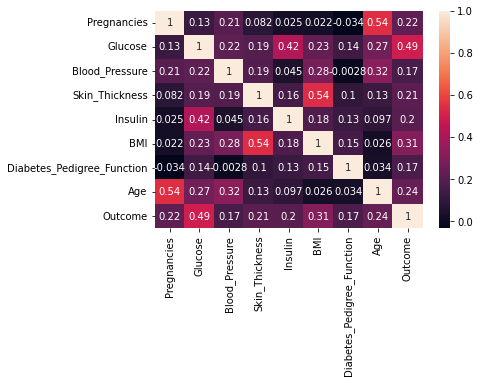

In [ ]:
sns.heatmap(df.corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


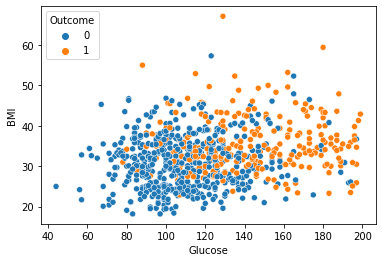

In [ ]:
sns.scatterplot('Glucose','BMI',hue='Outcome',data=df)

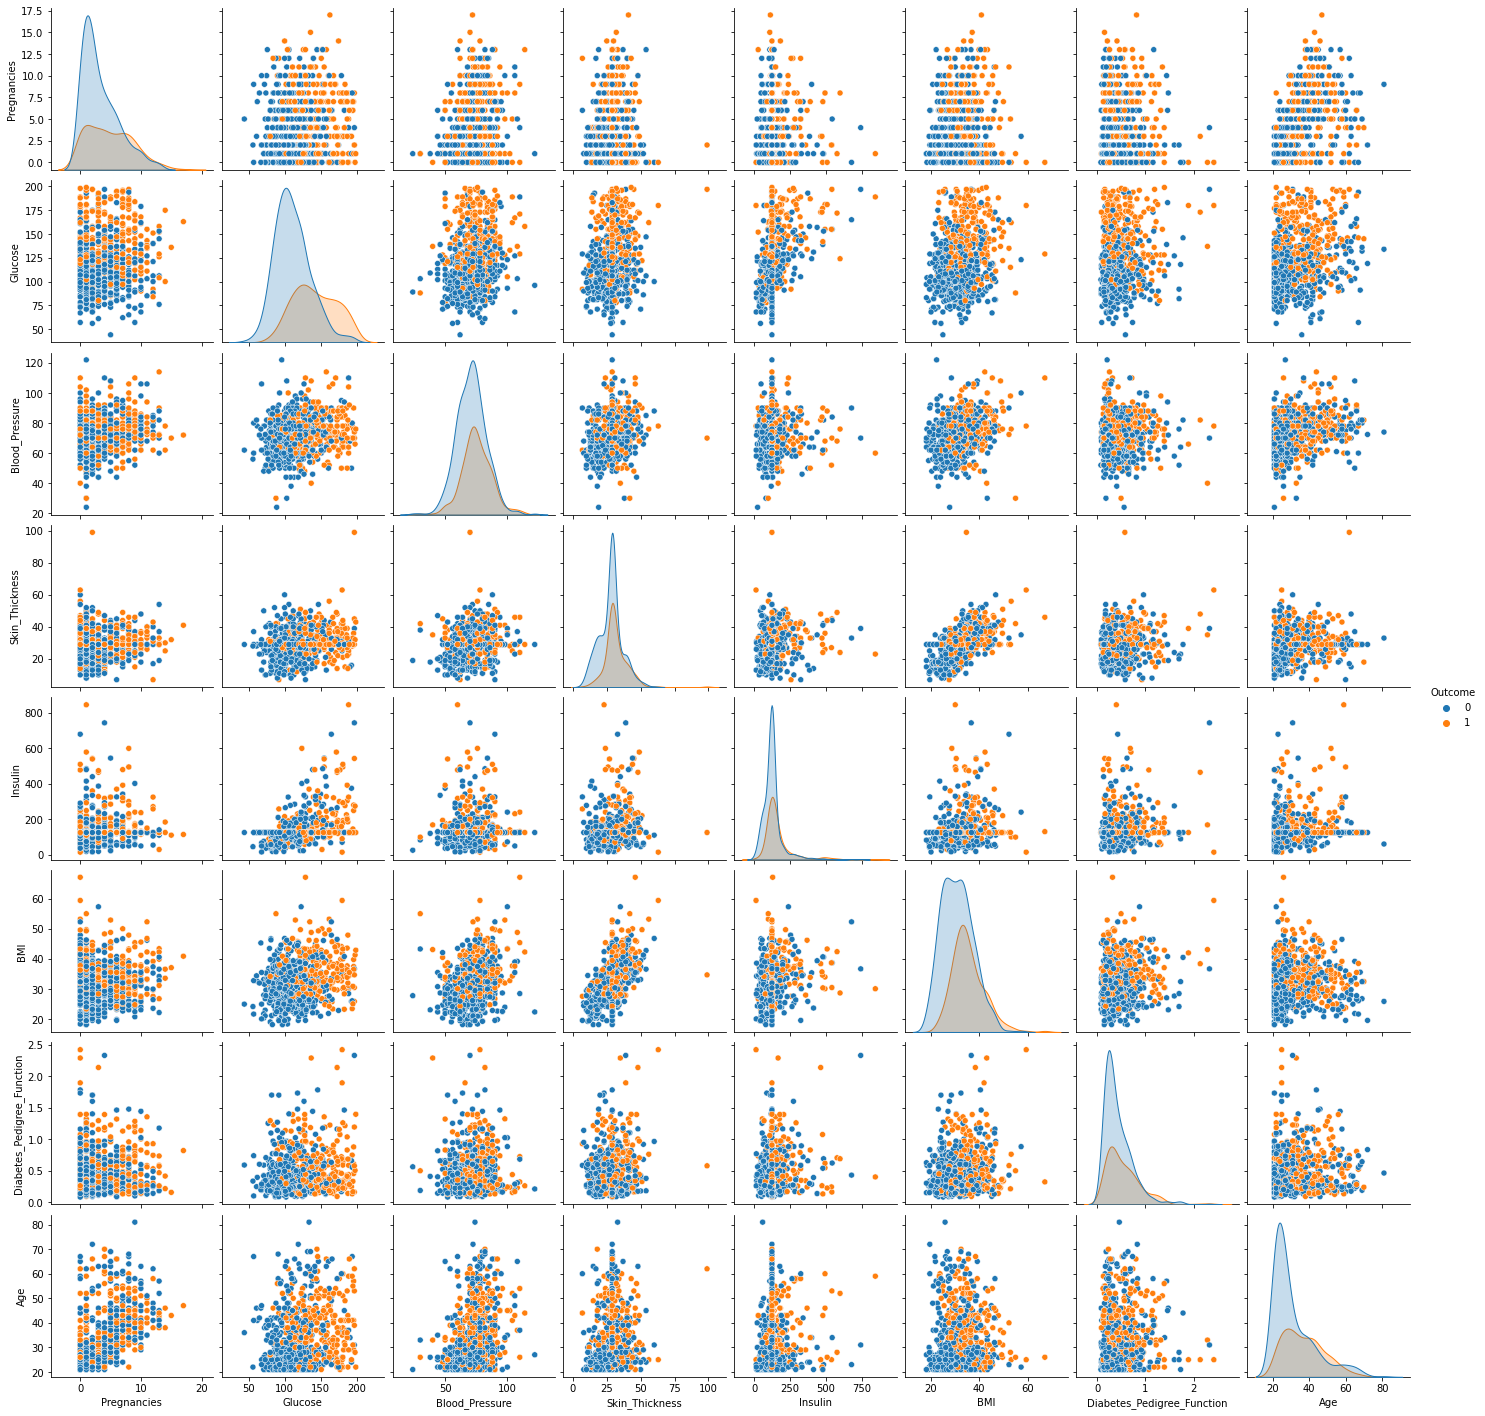

In [ ]:
sns.pairplot(df,hue='Outcome')

In [ ]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

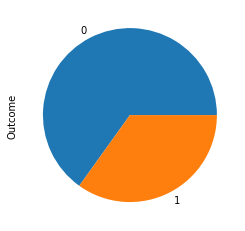

In [ ]:
#plotting a pie chart to show the ratio of diabetic to non diabetic people
df['Outcome'].value_counts().plot.pie()


**Data Modeling**

1.Data Modelling with logistic regression

In [ ]:
features = df.iloc[:,0:8]
target = y=df.iloc[:,-1:]

In [ ]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split( features, target, test_size=0.25, random_state=12345)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train,target_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12345, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)

In [ ]:
model.score(features, target)

0.76953125

2.Data Modelling with RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=12345, n_estimators=3)

In [ ]:
features = df.iloc[:,0:8]
target = y=df.iloc[:,-1:]

model.fit(features, target)
model.score(features, target)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9401041666666666

3.Data Modelling with Decision Tree Classifier

In [ ]:
features = df.iloc[:,0:8]
target = y=df.iloc[:,-1:]

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=12345, max_depth=3)
model.fit(features, target)
model.score(features, target)

0.7747395833333334

Findings and Recommendations

Accuracy.


1.A random forest has the highest accuracy of 0.9466145833333334 because it uses an ensemble of trees instead of just one

2.Glucose and BMI and Age shows stronger relationship with Outcome

3. 65% of the people are non-diabetic